# Ignasius Maret Ismoyo

# -------------------------------------------------------
# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


# -------------------------------------------------------
# Upload Data

In [2]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# -------------------------------------------------------
# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
dup_value = df.duplicated().sum()
nan_value = df.isna().sum().sum()
null_value = df.isnull().sum().sum()
print(f'Row = {df.shape[0]}, columns = {df.shape[1]}')
print(f'Total duplicated data = {dup_value}')
print(f'Total Null Values = {null_value}')
print(f'Total NaN Values = {nan_value}')

Row = 374, columns = 13
Total duplicated data = 0
Total Null Values = 219
Total NaN Values = 219


In [5]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
dup_value = df.duplicated().sum()
nan_value = df.isna().sum().sum()
null_value = df.isnull().sum().sum()
print(f'Row = {df.shape[0]}, columns = {df.shape[1]}')
print(f'Total duplicated data = {dup_value}')
print(f'Total Null Values = {null_value}')
print(f'Total NaN Values = {nan_value}')

Row = 374, columns = 13
Total duplicated data = 0
Total Null Values = 0
Total NaN Values = 0


In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# -------------------------------------------------------
# 1. sleep disorders distribution

In [8]:
disorder_counts = df['Sleep Disorder'].value_counts()
disorder_counts

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [9]:
# # if want to use plotly pie chart, run it!
# fig = px.pie(disorder_counts,
#              values=df['Sleep Disorder'],
#              names=['None','Insomnia','Sleep Apnea'],
#              title="Sleep Disorders Distribution",
#              color_discrete_sequence=px.colors.sequential.RdBu, width = 650)
# fig.show()

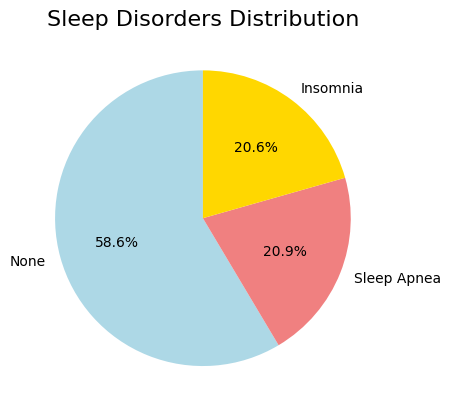

In [10]:
# if want to use matplotlib pie chart, run it!
plt.pie(disorder_counts, 
        labels=disorder_counts.index, 
        autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral', 'gold'], 
        startangle=90)

plt.title('Sleep Disorders Distribution', fontsize=16)

plt.show()

# -------------------------------------------------------
# 2. BMI Category Distribution

In [11]:
bmiCat_counts = df['BMI Category'].value_counts()
bmiCat_counts

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [12]:
# # if want to use plotly pie chart, run it!
# bmiCat_counts = df['BMI Category'].value_counts()
# fig = px.pie(bmiCat_counts,
#              values='BMI Category',
#              names=['Normal','Overweight','Normal weight','Obese'],
#              title="BMI Category Distribution",
#              color_discrete_sequence=px.colors.sequential.RdBu, width = 650)
# fig.show()

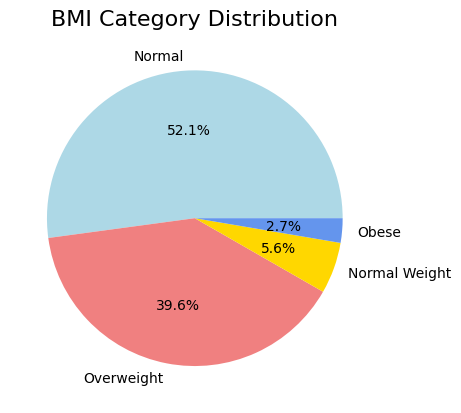

In [13]:
# if want to use matplotlib pie chart, run it!
plt.pie(bmiCat_counts, 
        labels=bmiCat_counts.index, 
        autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral', 'gold','cornflowerblue'])

plt.title('BMI Category Distribution', fontsize=16)

plt.show()

# -------------------------------------------------------
# 3. various effect of sleep disorders

In [14]:
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


In [15]:
sd_sl_head = df.groupby(['Sleep Disorder','Occupation'])['Stress Level'].apply(lambda x: x.value_counts().idxmax()).sort_values(ascending=False).reset_index().head(5)
sd_sl_head

,Sleep Disorder,Occupation,Stress Level
0,None,Doctor,8
1,Sleep Apnea,Scientist,8
2,Sleep Apnea,Sales Representative,8
3,Sleep Apnea,Nurse,8
4,Insomnia,Software Engineer,8


In [16]:
sd_sl = np.round(df.groupby(['Sleep Disorder','Gender'])['Stress Level'].apply(lambda x: x.mean()), 2).sort_values(ascending=False).reset_index()
sd_sl

,Sleep Disorder,Gender,Stress Level
0,Insomnia,Male,6.76
1,Sleep Apnea,Male,5.91
2,None,Male,5.89
3,Sleep Apnea,Female,5.63
4,Insomnia,Female,4.86
5,None,Female,3.82


In [17]:
fig = px.histogram(sd_sl, x="Sleep Disorder", y="Stress Level", text_auto='.3s',
             color='Gender', barmode='group',
             height=650, width = 1000)
fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_text='Sleep Disorder Impact for Stress Level by Gender')
fig.show()

In [18]:
sd_QoS = np.round(df.groupby(['Sleep Disorder','BMI Category'])['Quality of Sleep'].apply(lambda x: x.mean()), 2).sort_values(ascending=True).reset_index()
sd_QoS

,Sleep Disorder,BMI Category,Quality of Sleep
0,Insomnia,Normal Weight,5.00
1,Sleep Apnea,Normal Weight,5.00
2,Insomnia,Obese,6.00
3,Insomnia,Overweight,6.47
4,Sleep Apnea,Obese,6.67
5,None,Overweight,6.95
6,Sleep Apnea,Overweight,7.31
7,Sleep Apnea,Normal,7.40
8,None,Normal,7.66
9,Insomnia,Normal,7.86


In [19]:
fig = px.histogram(sd_QoS, x="Sleep Disorder", y="Quality of Sleep", text_auto='.3s',
             color='BMI Category', barmode='group',
             height=650, width = 1000)
fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_text='Sleep Disorder Impact for BMI Category by Quality of Sleep')
fig.show()

In [20]:
sd_dailyStepSum = df.groupby('Sleep Disorder')['Daily Steps'].sum().sort_values(ascending=True).reset_index()
sd_dailyStepSum

,Sleep Disorder,Daily Steps
0,Insomnia,454400
1,Sleep Apnea,594300
2,None,1500800


In [21]:
fig = px.line(sd_dailyStepSum, x='Sleep Disorder', y='Daily Steps', markers=True, width = 600)
fig.update_layout(title_text='Sleep Disorder Impact for Daily Step')
fig.show()

In [22]:
sd_dailyStepMean = np.round(df.groupby('Sleep Disorder')['Daily Steps'].mean(), 0).sort_values(ascending=True).reset_index()
sd_dailyStepMean

,Sleep Disorder,Daily Steps
0,Insomnia,5901.0
1,None,6853.0
2,Sleep Apnea,7619.0


In [23]:
fig = px.line(sd_dailyStepMean, x='Sleep Disorder', y='Daily Steps', markers=True, width = 600)
fig.update_layout(title_text='Sleep Disorder Impact for Average Daily Step')
fig.show()

In [24]:
sd_sleepDur = np.round(df.groupby(['Sleep Disorder','Gender'])['Sleep Duration'].mean(), 2).sort_values(ascending=True).reset_index()
sd_sleepDur

,Sleep Disorder,Gender,Sleep Duration
0,Insomnia,Male,6.55
1,Insomnia,Female,6.63
2,Sleep Apnea,Male,7.01
3,Sleep Apnea,Female,7.04
4,None,Male,7.18
5,None,Female,7.65


In [25]:
fig = px.histogram(sd_sleepDur, x="Sleep Disorder", y="Sleep Duration", text_auto='.3s',
             color='Gender', barmode='group',
             height=650, width = 1000)
fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_text='Sleep Disorder Impact for Gender by Sleep Duration')
fig.show()